PyTorch는 Python에서 인공 신경망 모델을 구축하고 학습하는 데 사용되는 강력한 딥러닝 라이브러리입니다.

# PyTorch 설치

In [ ]:
pip install torch


Note: you may need to restart the kernel to use updated packages.


    matplotlib-inline (<0.2.0appnope,>=0.1.0) ; platform_system == "Darwin"
                      ~~~~~~~~^

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
pip install --upgrade notebook

  Using cached notebook-7.2.2-py3-none-any.whl.metadata (10 kB)



ERROR: Could not install packages due to an OSError: [WinError 32] 다른 프로세스가 파일을 사용 중이기 때문에 프로세스가 액세스 할 수 없습니다: 'c:\\users\\jyb\\appdata\\local\\programs\\python\\python39\\Scripts\\jupyter-notebook.exe' -> 'c:\\users\\jyb\\appdata\\local\\programs\\python\\python39\\Scripts\\jupyter-notebook.exe.deleteme'
Consider using the `--user` option or check the permissions.



Using cached notebook-7.2.2-py3-none-any.whl (5.0 MB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# 라이브러리

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Tensor를 생성

PyTorch에서 Tensor는 다양한 방법으로 생성할 수 있으며, 초기화 방식도 다양합니다.

데이터 타입과 크기 변경 기능을 활용할 수 있습니다.

PyTorch의 자동 미분 기능과 결합하면, 딥러닝 모델을 구축하는 데 매우 유용합니다.


In [ ]:
# PyTorch의 기본 데이터 구조인 Tensor를 생성합니다.

## 리스트로부터 Tensor 생성

In [ ]:
tensor_from_list = torch.tensor([[1, 2], [3, 4]])
print("Tensor from list:\n", tensor_from_list)

Tensor from list:
 tensor([[1, 2],
        [3, 4]])


In [ ]:
tensor_from_list

tensor([[1, 2],
        [3, 4]])

In [ ]:
x = torch.tensor([[1.0, 2.0], [3.0, 4.0]], requires_grad=True)
print("Tensor x:\n", x)

Tensor x:
 tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


In [ ]:
x

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

## 랜덤 Tensor 생성

In [ ]:
random_tensor = torch.rand(3, 3)  # 3x3 랜덤 값
print("\nRandom Tensor:\n", random_tensor)


Random Tensor:
 tensor([[0.5155, 0.3760, 0.2359],
        [0.2958, 0.3185, 0.5707],
        [0.7898, 0.6813, 0.7006]])


## 모든 값이 0인 Tensor 생성

In [ ]:
zeros_tensor = torch.zeros(2, 4)  # 2x4 크기의 0으로 초기화된 Tensor
print("\nZeros Tensor:\n", zeros_tensor)


Zeros Tensor:
 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])


## 모든 값이 1인 Tensor 생성

In [ ]:
ones_tensor = torch.ones(2, 2)  # 2x2 크기의 1로 초기화된 Tensor
print("\nOnes Tensor:\n", ones_tensor)


Ones Tensor:
 tensor([[1., 1.],
        [1., 1.]])


## 단위 행렬 (Identity matrix) 생성

In [ ]:
identity_tensor = torch.eye(3)  # 3x3 단위 행렬
print("\nIdentity Tensor:\n", identity_tensor)


Identity Tensor:
 tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


## 데이터 타입 지정 (float32)

In [ ]:
float_tensor = torch.tensor([1.5, 2.5, 3.5], dtype=torch.float32)
print("\nFloat Tensor:\n", float_tensor)


Float Tensor:
 tensor([1.5000, 2.5000, 3.5000])


## 텐서의 크기와 데이터 타입 변경 (reshape 및 type casting)

In [ ]:
reshaped_tensor = float_tensor.view(3, 1)  # (3,) -> (3, 1) 크기로 변경
int_tensor_cast = float_tensor.to(torch.int32)  # float -> int로 변환
print("\nReshaped Tensor:\n", reshaped_tensor)
print("\nCasted Integer Tensor:\n", int_tensor_cast)


Reshaped Tensor:
 tensor([[1.5000],
        [2.5000],
        [3.5000]])

Casted Integer Tensor:
 tensor([1, 2, 3], dtype=torch.int32)


## 표준 정규분포로 초기화된 Tensor 생성

In [ ]:
normal_tensor = torch.randn(4, 4)  # 평균 0, 표준편차 1
print("\nNormally Initialized Tensor:\n", normal_tensor)


Normally Initialized Tensor:
 tensor([[ 1.2739,  0.3791,  1.4452,  0.5821],
        [-1.0065,  1.7229, -1.0153,  0.7499],
        [-0.4400,  0.4665,  1.5367, -1.1874],
        [ 0.7468,  0.2378,  0.3413,  1.5347]])


## 특정 값으로 초기화된 Tensor 생성

In [ ]:
filled_tensor = torch.full((2, 3), 7)  # 2x3 크기, 모든 값이 7
print("\nFilled Tensor:\n", filled_tensor)


Filled Tensor:
 tensor([[7, 7, 7],
        [7, 7, 7]])


## Tensor의 크기, 데이터 타입, 장치 정보

In [ ]:
tensor = torch.rand(3, 3)
print("\nTensor Size:", tensor.size())
print("Tensor Data Type:", tensor.dtype)
print("Tensor Device:", tensor.device)


Tensor Size: torch.Size([3, 3])
Tensor Data Type: torch.float32
Tensor Device: cpu


# 기본 연산

코드 설명
Tensor 생성:
torch.tensor() 메서드를 사용해 Tensor를 생성합니다.

덧셈, 뺄셈, 곱셈, 나눗셈:
기본 연산(+, -, *, /)은 요소별(element-wise)로 수행됩니다.

행렬 곱셈:
torch.matmul() 또는 @ 연산자를 사용해 행렬 곱셈을 수행합니다.

지수 연산과 제곱:
torch.exp()는 지수 함수(e^x),는 제곱 연산입니다.

합계, 평균, 최대값:
.sum(), .mean(), .max() 메서드를 사용해 연산합니다.
.argmax()는 최대값의 인덱스를 반환합니다.

Tensor 크기 변경 (Reshape):
.view() 메서드를 사용해 Tensor의 크기를 변경할 수 있습니다.

Tensor 복사:
.clone() 메서드는 Tensor를 깊은 복사합니다.

In [ ]:
import torch

# 1. Tensor 생성
a = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
b = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)

print("Tensor a:\n", a)
print("Tensor b:\n", b)

# 2. Tensor 덧셈
add_result = a + b
print("\nTensor 덧셈 결과 (a + b):\n", add_result)

# 3. Tensor 뺄셈
sub_result = a - b
print("\nTensor 뺄셈 결과 (a - b):\n", sub_result)

# 4. Tensor 곱셈 (요소별 곱)
mul_result = a * b
print("\nTensor 곱셈 결과 (a * b):\n", mul_result)

# 5. 행렬 곱셈 (Matrix Multiplication)
matmul_result = torch.matmul(a, b)
print("\n행렬 곱셈 결과 (a @ b):\n", matmul_result)

# 6. Tensor 나눗셈
div_result = a / b
print("\nTensor 나눗셈 결과 (a / b):\n", div_result)

# 7. Tensor 지수 연산
exp_result = torch.exp(a)
print("\nTensor 지수 연산 결과 (exp(a)):\n", exp_result)

# 8. Tensor 제곱
square_result = a ** 2
print("\nTensor 제곱 결과 (a ** 2):\n", square_result)

# 9. 합계와 평균
sum_result = a.sum()
mean_result = a.mean()
print("\nTensor 합계 (sum(a)):", sum_result.item())
print("Tensor 평균 (mean(a)):", mean_result.item())

# 10. 최대값과 인덱스 찾기
max_value, max_index = a.max(), a.argmax()
print("\nTensor 최대값 (max(a)):", max_value.item())
print("Tensor 최대값의 인덱스 (argmax(a)):", max_index.item())

# 11. Tensor 크기 변경 (Reshape)
reshaped = a.view(4)
print("\nReshaped Tensor (view(4)):\n", reshaped)

# 12. Tensor 복사 (Clone)
a_copy = a.clone()
a_copy[0, 0] = 10
print("\nOriginal Tensor a:\n", a)
print("Cloned Tensor a_copy (변경됨):\n", a_copy)


Tensor a:
 tensor([[1., 2.],
        [3., 4.]])
Tensor b:
 tensor([[5., 6.],
        [7., 8.]])

Tensor 덧셈 결과 (a + b):
 tensor([[ 6.,  8.],
        [10., 12.]])

Tensor 뺄셈 결과 (a - b):
 tensor([[-4., -4.],
        [-4., -4.]])

Tensor 곱셈 결과 (a * b):
 tensor([[ 5., 12.],
        [21., 32.]])

행렬 곱셈 결과 (a @ b):
 tensor([[19., 22.],
        [43., 50.]])

Tensor 나눗셈 결과 (a / b):
 tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])

Tensor 지수 연산 결과 (exp(a)):
 tensor([[ 2.7183,  7.3891],
        [20.0855, 54.5981]])

Tensor 제곱 결과 (a ** 2):
 tensor([[ 1.,  4.],
        [ 9., 16.]])

Tensor 합계 (sum(a)): 10.0
Tensor 평균 (mean(a)): 2.5

Tensor 최대값 (max(a)): 4.0
Tensor 최대값의 인덱스 (argmax(a)): 3

Reshaped Tensor (view(4)):
 tensor([1., 2., 3., 4.])

Original Tensor a:
 tensor([[1., 2.],
        [3., 4.]])
Cloned Tensor a_copy (변경됨):
 tensor([[10.,  2.],
        [ 3.,  4.]])


# 자동 미분(Automatic Differentiation) 기능

PyTorch에서는 자동 미분(Automatic Differentiation) 기능을 제공하며, 이를 통해 **역전파(Backpropagation)**를 자동으로 수행할 수 있습니다.

PyTorch의 autograd 모듈은 모든 Tensor 연산을 추적하고, .backward() 메서드를 호출하면 미분 계산을 자동으로 수행합니다.

## 기본 사례

In [ ]:
# requires_grad=True: Tensor x는 미분이 필요하다는 뜻입니다.
# y.backward(): y를 x에 대해 미분하고, 결과를 x.grad에 저장합니다.
# dy/dx = 2 * x + 3이므로, x = 2.0일 때, dy/dx = 7.0이 됩니다.

In [ ]:
import torch

# 1. Tensor 생성 (자동 미분 활성화)
x = torch.tensor(2.0, requires_grad=True)
y = x**2 + 3 * x + 4

# 2. y를 x에 대해 미분 (Backward)
y.backward()

# 3. x에 대한 미분 결과 출력
print("x의 값:", x.item())
print("y의 값:", y.item())
print("x에 대한 미분(dy/dx):", x.grad.item())


x의 값: 2.0
y의 값: 14.0
x에 대한 미분(dy/dx): 7.0


## 다변수 함수의 자동 미분 예제

In [ ]:
# 1. Tensor 생성
x = torch.tensor([1.0, 2.0], requires_grad=True)
y = x[0]**2 + x[1]**3

# 2. y를 x에 대해 미분 (Backward)
y.backward()

# 3. x에 대한 미분 결과 출력
print("x의 값:", x)
print("y의 값:", y.item())
print("x[0]에 대한 미분:", x.grad[0].item())
print("x[1]에 대한 미분:", x.grad[1].item())


x의 값: tensor([1., 2.], requires_grad=True)
y의 값: 9.0
x[0]에 대한 미분: 2.0
x[1]에 대한 미분: 12.0


## autograd 자동 미분 기능

PyTorch의 **autograd**는 자동 미분 기능을 제공합니다.

.backward() 메서드를 호출하면, 역전파가 수행되어 기울기가 자동으로 계산됩니다.

자동 미분은 모델 학습에 중요한 역할을 하며, 손실 함수의 기울기를 계산해 가중치를 업데이트하는 데 사용됩니다.


In [ ]:
# 1. 데이터 정의
x = torch.tensor([[1.0], [2.0], [3.0]], requires_grad=True)
y = torch.tensor([[2.0], [4.0], [6.0]])

# 2. 가중치 초기화
w = torch.tensor([[0.0]], requires_grad=True)

# 3. 학습률 설정
learning_rate = 0.1

# 4. 학습 반복문
for epoch in range(100):
    # 예측 계산
    y_pred = x.mm(w)

    # 손실 계산 (MSE)
    loss = ((y_pred - y) ** 2).mean()

    # 역전파 수행
    loss.backward()

    # 가중치 업데이트
    with torch.no_grad():
        w -= learning_rate * w.grad

    # 기울기 초기화
    w.grad.zero_()

    # 10번째 에포크마다 손실 출력
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}: Loss = {loss.item():.4f}")

# 5. 학습 완료 후 가중치 출력
print("학습된 가중치 (w):", w.item())


Epoch 10: Loss = 0.0000
Epoch 20: Loss = 0.0000
Epoch 30: Loss = 0.0000
Epoch 40: Loss = 0.0000
Epoch 50: Loss = 0.0000
Epoch 60: Loss = 0.0000
Epoch 70: Loss = 0.0000
Epoch 80: Loss = 0.0000
Epoch 90: Loss = 0.0000
Epoch 100: Loss = 0.0000
학습된 가중치 (w): 2.0


In [ ]:
# 자동 미분을 사용해 손실의 기울기(w.grad)를 계산하고, 이를 사용해 가중치를 업데이트합니다.
# 학습이 완료되면, w의 값은 2.0에 근접하게 됩니다.

# 실습 사례

## 선형 회귀 모델

코드 설명

Tensor 생성 및 기본 연산:
PyTorch의 기본 데이터 구조인 Tensor를 생성합니다.
requires_grad=True는 **자동 미분(Gradient Calculation)**을 활성화합니다.
Tensor 연산 후, .backward() 메서드로 자동 미분을 수행할 수 있습니다.

간단한 선형 회귀 모델 정의:
nn.Module을 상속받아 신경망 모델을 정의합니다.
nn.Linear는 선형 회귀 레이어를 생성합니다.

손실 함수 및 옵티마이저 정의:
nn.MSELoss()는 **평균 제곱 오차 손실(MSE Loss)**를 사용합니다.
optim.SGD()는 **확률적 경사 하강법(SGD)**을 사용해 가중치를 업데이트합니다.

학습 루프:
학습 데이터로 모델을 학습시킵니다.
optimizer.zero_grad()로 기울기를 초기화하고, loss.backward()로 역전파를 수행한 뒤, optimizer.step()으로 가중치를 업데이트합니다.

모델 평가:
학습된 모델을 사용해 새로운 입력값에 대한 예측을 수행합니다.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# 1. Tensor 생성
x = torch.tensor([[1.0, 2.0], [3.0, 4.0]], requires_grad=True)
print("Tensor x:\n", x)

# 2. 기본 연산
y = x + 2
z = y * y * 3
out = z.mean()
print("Tensor y:\n", y)
print("Tensor z:\n", z)
print("Output (mean of z):", out)

# 3. 자동 미분
out.backward()
print("Gradient of x:\n", x.grad)

# 4. 간단한 선형 회귀 모델 정의
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# 5. 모델, 손실 함수, 옵티마이저 정의
model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 6. 학습 데이터 준비
x_train = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y_train = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

# 7. 학습 루프
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # 예측값 계산
    y_pred = model(x_train)

    # 손실 계산
    loss = criterion(y_pred, y_train)

    # 역전파 및 가중치 업데이트
    loss.backward()
    optimizer.step()

    # 로그 출력
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# 8. 모델 평가
model.eval()
with torch.no_grad():
    test_input = torch.tensor([[5.0]])
    prediction = model(test_input)
    print("Prediction for input 5.0:", prediction.item())


Tensor x:
 tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
Tensor y:
 tensor([[3., 4.],
        [5., 6.]], grad_fn=<AddBackward0>)
Tensor z:
 tensor([[ 27.,  48.],
        [ 75., 108.]], grad_fn=<MulBackward0>)
Output (mean of z): tensor(64.5000, grad_fn=<MeanBackward0>)
Gradient of x:
 tensor([[4.5000, 6.0000],
        [7.5000, 9.0000]])
Epoch [10/100], Loss: 0.5211
Epoch [20/100], Loss: 0.0708
Epoch [30/100], Loss: 0.0559
Epoch [40/100], Loss: 0.0523
Epoch [50/100], Loss: 0.0493
Epoch [60/100], Loss: 0.0464
Epoch [70/100], Loss: 0.0437
Epoch [80/100], Loss: 0.0412
Epoch [90/100], Loss: 0.0388
Epoch [100/100], Loss: 0.0365
Prediction for input 5.0: 9.673429489135742


## PyTorch 분류 모델 실습 예제

PyTorch를 사용해 간단한 분류 모델(Classification Model)을 구현하는 예제입니다. 

이 코드는 Iris 데이터셋을 사용해 다중 클래스 분류 문제를 해결합니다.

주요 단계

데이터 준비: 데이터를 로드하고 전처리합니다.

모델 정의: 신경망 모델을 정의합니다.

손실 함수 및 옵티마이저 정의: 분류 문제에 적합한 손실 함수와 옵티마이저를 설정합니다.

모델 학습: 학습 데이터를 사용해 모델을 훈련시킵니다.

모델 평가: 테스트 데이터를 사용해 모델을 평가하고 정확도를 출력합니다.

코드 설명

In [ ]:
# 데이터 준비:
# load_iris()로 Iris 데이터를 불러옵니다.
# StandardScaler를 사용해 데이터를 표준화합니다.
# 데이터를 PyTorch Tensor로 변환합니다.

# 모델 정의:
# SimpleNN 클래스는 신경망 모델입니다.
# 입력층, 은닉층, 출력층을 포함한 간단한 네트워크입니다.
# 활성화 함수로 ReLU를 사용합니다.

# 손실 함수 및 옵티마이저 정의:
# 분류 문제에서는 **CrossEntropyLoss**를 사용합니다.
# 옵티마이저로 Adam을 사용해 가중치를 업데이트합니다.

# 모델 학습:
# 각 에포크마다 예측값을 계산하고, 손실을 최소화하기 위해 역전파를 수행합니다.
# 10번째 에포크마다 손실 값을 출력합니다.

# 모델 평가:
# 테스트 데이터를 사용해 모델의 성능을 평가합니다.
# 예측값(y_pred)과 실제값(y_test)을 비교해 정확도를 계산합니다.

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. 데이터 준비
iris = load_iris()
X = iris.data
y = iris.target

# 데이터 표준화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터를 Tensor로 변환
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 모델 정의
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(4, 16)  # 입력층: 4, 은닉층: 16
        self.fc2 = nn.Linear(16, 3)  # 은닉층: 16, 출력층: 3 (클래스 수)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 모델 인스턴스 생성
model = SimpleNN()

# 3. 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 4. 모델 학습
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # 예측값 계산
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # 역전파 및 가중치 업데이트
    loss.backward()
    optimizer.step()

    # 학습 로그 출력
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# 5. 모델 평가
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = torch.argmax(y_pred, dim=1)
    accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch [10/100], Loss: 0.6511
Epoch [20/100], Loss: 0.4452
Epoch [30/100], Loss: 0.3384
Epoch [40/100], Loss: 0.2614
Epoch [50/100], Loss: 0.2026
Epoch [60/100], Loss: 0.1568
Epoch [70/100], Loss: 0.1238
Epoch [80/100], Loss: 0.1011
Epoch [90/100], Loss: 0.0858
Epoch [100/100], Loss: 0.0758
Test Accuracy: 100.00%


In [7]:
import warnings
warnings.filterwarnings("ignore")


In [9]:
nn.Transformer(d_model=64, nhead=4, batch_first=True)


Transformer(
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-5): 6 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
    (norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  )
  (decoder): TransformerDecoder(
    (layers): ModuleList(
      (0-5): 6 x TransformerDecoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_featu

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

In [11]:
# 6. 손실 함수 시각화
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), losses, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.show()

# 7. 테스트 데이터 예측 시각화
plt.figure(figsize=(10, 5))
colors = ['red', 'blue', 'green']
for i in range(3):
    plt.scatter(X_test[y_test == i][:, 0], X_test[y_test == i][:, 1], color=colors[i], label=f"Class {i} - True", alpha=0.6)
    plt.scatter(X_test[y_pred == i][:, 0], X_test[y_pred == i][:, 1], color=colors[i], edgecolor='k', marker='x', label=f"Class {i} - Predicted", alpha=0.6)

plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.title("True vs Predicted Classes on Test Data")
plt.legend()
plt.show()


AttributeError: module 'matplotlib' has no attribute 'backends'

## 실습 사례: 다층 퍼셉트론 (MLP)으로 손글씨 숫자 분류 (MNIST 데이터셋)

코드 설명

데이터 로드 및 전처리:
ToTensor()는 이미지를 Tensor로 변환하고, Normalize()는 픽셀 값을 정규화합니다.
DataLoader를 사용해 학습 및 테스트 데이터를 배치 단위로 로드합니다.

MLP 모델 정의:
nn.Linear()를 사용해 선형 계층을 정의합니다.
ReLU 활성화 함수를 사용합니다.
입력 이미지는 28x28 픽셀이며, 이를 **1차원 벡터(784 차원)**로 변환합니다.

손실 함수 및 옵티마이저 정의:
CrossEntropyLoss는 다중 클래스 분류 문제에서 사용되는 손실 함수입니다.
Adam 옵티마이저는 학습 속도를 조정합니다.

학습 루프:
optimizer.zero_grad()로 기울기를 초기화하고, loss.backward()로 역전파를 수행합니다.
optimizer.step()으로 가중치를 업데이트합니다.

모델 평가:
테스트 데이터에서 정확도를 계산합니다.
torch.max()를 사용해 예측된 클래스를 선택합니다.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# 1. 데이터셋 로드 및 전처리
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # 픽셀 값을 -1에서 1로 정규화
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# 2. MLP 모델 정의
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)  # 입력층 (28x28 픽셀 -> 256 뉴런)
        self.fc2 = nn.Linear(256, 128)      # 은닉층 (256 -> 128 뉴런)
        self.fc3 = nn.Linear(128, 10)       # 출력층 (128 -> 10 클래스)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 3. 모델, 손실 함수, 옵티마이저 정의
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. 학습 함수 정의
def train(model, loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in loader:
            # 옵티마이저 초기화
            optimizer.zero_grad()

            # 예측 및 손실 계산
            outputs = model(images)
            loss = criterion(outputs, labels)

            # 역전파 및 가중치 업데이트
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {total_loss / len(loader):.4f}")

# 5. 모델 평가 함수 정의
def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# 6. 모델 학습 및 평가
train(model, train_loader, criterion, optimizer, epochs=5)
evaluate(model, test_loader)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:03<00:00, 3.18MB/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 143kB/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:01<00:00, 1.25MB/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 929kB/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Epoch [1/5], Loss: 0.3406
Epoch [2/5], Loss: 0.1480
Epoch [3/5], Loss: 0.1107
Epoch [4/5], Loss: 0.0880
Epoch [5/5], Loss: 0.0750
Test Accuracy: 96.75%


설명
Epoch: 모델이 전체 학습 데이터를 한 번 반복 학습한 횟수를 나타냅니다. 위 예시에서는 5번의 Epoch 동안 학습이 진행되었습니다.
Loss: 손실 함수 값으로, 모델의 예측값과 실제값 간의 차이를 나타냅니다.
학습 초기에 손실 값이 높다가, 학습이 진행될수록 손실 값이 감소하는 것이 일반적입니다.
손실 값이 감소하면, 모델이 점점 더 정확하게 예측하고 있다는 뜻입니다.

예시 설명
1번째 Epoch에서 손실 값이 0.3024로 시작했습니다.
5번째 Epoch에서는 손실 값이 0.0487로 줄어들었습니다.
손실 값이 줄어든다는 것은 모델이 학습 데이터에 대해 점점 더 잘 맞춰지고 있음을 의미합니다.

2. 테스트 정확도 (Test Accuracy)
mathematica

Test Accuracy: 98.10%
Test Accuracy는 테스트 데이터에서 모델의 예측 정확도를 나타냅니다.
정확도는 모델이 올바르게 예측한 샘플의 비율입니다.
예를 들어, 10,000개의 테스트 샘플 중 9,810개를 정확하게 예측했다면, 정확도는 (9810 / 10000) * 100 = 98.10%가 됩니다.

**98.10%**의 정확도는 모델이 테스트 데이터에서 매우 좋은 성능을 보였음을 나타냅니다.

출력 결과 분석
모델이 학습 데이터에서 잘 학습되었으며, 테스트 데이터에서도 높은 정확도를 보여줍니다.
손실 값이 낮아지고, 정확도가 높다는 것은 모델이 과적합(overfitting) 없이 학습 데이터를 잘 학습했다는 긍정적인 신호입니다.

## CNN 모델을 사용해 MNIST 데이터를 분류

코드 설명

데이터 로드 및 전처리:
torchvision을 사용해 MNIST 데이터를 다운로드하고, 정규화(Normalize)와 Tensor 변환(ToTensor())을 수행합니다.

DataLoader를 사용해 데이터를 배치(batch) 단위로 로드합니다.

CNN 모델 정의:
nn.Conv2d: 합성곱 레이어를 사용해 이미지 특징을 추출합니다.

nn.MaxPool2d: 최대 풀링 레이어로 특징 맵을 다운샘플링합니다.

nn.Linear: **완전 연결층(Fully Connected Layer)**을 사용해 출력을 10개의 클래스로 분류합니다.

손실 함수 및 옵티마이저 정의:

nn.CrossEntropyLoss(): 다중 클래스 분류 문제에 적합한 손실 함수입니다.

optim.Adam(): Adam 옵티마이저를 사용해 가중치를 업데이트합니다.

학습 함수:

model.train(): 모델을 학습 모드로 설정합니다.

optimizer.zero_grad(): 기울기를 초기화합니다.

loss.backward(): 역전파를 통해 기울기를 계산합니다.

optimizer.step(): 가중치를 업데이트합니다.

평가 함수:

model.eval(): 모델을 평가 모드로 설정합니다.

torch.no_grad(): 평가 시 기울기 계산을 비활성화하여 메모리 사용을 줄입니다.

모델 학습 및 평가:

train_model(): 모델을 학습시킵니다.

evaluate_model(): 테스트 데이터로 모델의 정확도를 평가합니다.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# 1. 데이터 로드 및 전처리
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 2. CNN 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 3. 모델, 손실 함수, 옵티마이저 정의
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. 학습 함수 정의
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # 기울기 초기화
            optimizer.zero_grad()

            # 순전파 및 손실 계산
            outputs = model(images)
            loss = criterion(outputs, labels)

            # 역전파 및 가중치 업데이트
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}")

# 5. 모델 평가 함수 정의
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# 6. 모델 학습 및 평가
train_model(model, train_loader, criterion, optimizer, epochs=5)
evaluate_model(model, test_loader)


Epoch [1/5], Loss: 0.1631
Epoch [2/5], Loss: 0.0458
Epoch [3/5], Loss: 0.0305
Epoch [4/5], Loss: 0.0234
Epoch [5/5], Loss: 0.0174
Test Accuracy: 99.01%


코드 설명
데이터셋 로드 및 전처리:
torchvision.datasets.MNIST를 사용해 MNIST 데이터셋을 불러옵니다.

transforms.Normalize()를 사용해 데이터를 표준화합니다.

CNN 모델 정의:
2개의 합성곱 레이어와 2개의 풀링 레이어, 2개의 Fully Connected 레이어로 구성된 CNN입니다.

손실 함수 및 옵티마이저 정의:
손실 함수로 **CrossEntropyLoss**를 사용하고, 옵티마이저로 Adam을 사용합니다.

학습 및 평가 함수:
train() 함수는 학습 데이터를 사용해 모델을 학습합니다.
evaluate() 함수는 테스트 데이터를 사용해 모델의 정확도를 계산합니다.

학습 루프:
5번의 에포크 동안 모델을 학습하고, 각 에포크마다 손실과 정확도를 출력합니다.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# 1. 데이터셋 로드 및 전처리
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.MNIST(
    root='./data', train=True, transform=transform, download=True
)
test_dataset = torchvision.datasets.MNIST(
    root='./data', train=False, transform=transform, download=True
)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 2. CNN 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 3. 모델, 손실 함수, 옵티마이저 정의
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. 모델 학습 함수
def train(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 예측 및 손실 계산
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 역전파 및 가중치 업데이트
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    return running_loss / len(loader)

# 5. 모델 평가 함수
def evaluate(model, loader, criterion, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# 6. 학습 루프
num_epochs = 5
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, criterion, optimizer, device)
    test_accuracy = evaluate(model, test_loader, criterion, device)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Accuracy: {test_accuracy:.2f}%")

# 7. 모델 평가
final_accuracy = evaluate(model, test_loader, criterion, device)
print(f"최종 테스트 정확도: {final_accuracy:.2f}%")


Epoch [1/5], Loss: 0.1530, Accuracy: 98.45%
Epoch [2/5], Loss: 0.0470, Accuracy: 98.92%
Epoch [3/5], Loss: 0.0321, Accuracy: 98.82%
Epoch [4/5], Loss: 0.0240, Accuracy: 98.82%
Epoch [5/5], Loss: 0.0192, Accuracy: 99.11%
최종 테스트 정확도: 99.11%


## PyTorch에서 Transformer 모델 실습 사례

PyTorch에서는 Transformer 모델을 구현할 수 있는 torch.nn.Transformer 모듈을 제공합니다.

Transformer는 **자연어 처리(NLP)**와 시계열 분석 등의 다양한 분야에서 많이 사용되는 모델입니다.

이 모델은 Self-Attention 메커니즘을 사용해 입력 간의 관계를 학습합니다.

In [ ]:
# 코드 설명

# 시계열 데이터 생성:
# generate_data() 함수는 sin 함수를 사용해 시계열 데이터를 생성합니다.
# 입력(X)과 타겟(Y) 데이터를 준비합니다.

# Transformer 모델 정의:
# nn.Transformer를 사용해 Transformer 모델을 정의합니다.
# Encoder와 Decoder는 Linear 레이어로 정의됩니다.
# Self-Attention 메커니즘은 nn.Transformer 내부에서 처리됩니다.

# 학습 루프:
# 입력 데이터(src)와 타겟 데이터(tgt)를 준비하고, Transformer 모델에 전달합니다.
# **손실(MSE Loss)**을 계산하고, 역전파를 통해 가중치를 업데이트합니다.

# 모델 평가 및 시각화:
# 학습이 완료된 모델을 사용해 예측을 수행합니다.
# 예측 결과를 실제 데이터와 비교하여 시각화합니다.

In [ ]:
pip install matplotlib


  Using cached matplotlib-3.9.2-cp39-cp39-win_amd64.whl.metadata (11 kB)



    matplotlib-inline (<0.2.0appnope,>=0.1.0) ; platform_system == "Darwin"
                      ~~~~~~~~^
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pingouin 0.5.3 requires pandas-flavor>=0.2.0, which is not installed.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Using cached matplotlib-3.9.2-cp39-cp39-win_amd64.whl (7.8 MB)


In [ ]:
pip install python-tk


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement python-tk (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for python-tk


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch [10/100], Loss: 0.3605
Epoch [20/100], Loss: 0.0977
Epoch [30/100], Loss: 0.0800
Epoch [40/100], Loss: 0.0416
Epoch [50/100], Loss: 0.0215
Epoch [60/100], Loss: 0.0148
Epoch [70/100], Loss: 0.0122
Epoch [80/100], Loss: 0.0104
Epoch [90/100], Loss: 0.0091
Epoch [100/100], Loss: 0.0080


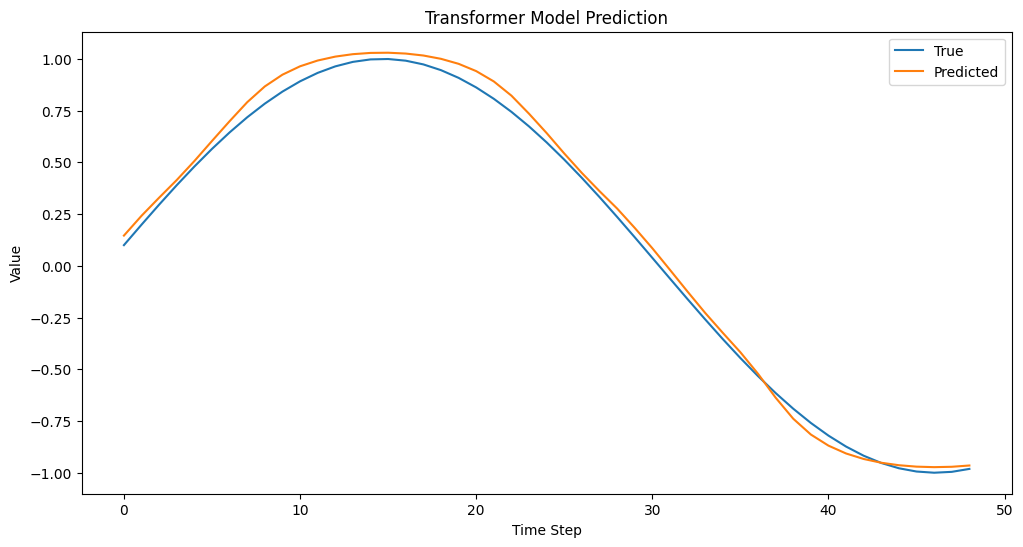

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 1. 시계열 데이터 생성
def generate_data(seq_length=50, n_samples=1000):
    x = np.linspace(0, 100, n_samples)
    y = np.sin(x)
    data = [y[i:i + seq_length] for i in range(len(y) - seq_length)]
    data = np.array(data)
    return data[:, :-1], data[:, 1:]

# 데이터 생성
seq_length = 50
X, Y = generate_data(seq_length)
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32)

# 2. Transformer 모델 정의
class TransformerModel(nn.Module):
    def __init__(self, input_dim, model_dim, n_heads, n_layers):
        super(TransformerModel, self).__init__()
        self.encoder = nn.Linear(input_dim, model_dim)
        self.transformer = nn.Transformer(
            d_model=model_dim, nhead=n_heads, num_encoder_layers=n_layers, num_decoder_layers=n_layers
        )
        self.decoder = nn.Linear(model_dim, input_dim)

    def forward(self, src, tgt):
        src = self.encoder(src)
        tgt = self.encoder(tgt)
        output = self.transformer(src, tgt)
        output = self.decoder(output)
        return output

# 3. 하이퍼파라미터 설정
input_dim = 1
model_dim = 64
n_heads = 4
n_layers = 3
learning_rate = 0.001
epochs = 100

# 4. 모델, 손실 함수, 옵티마이저 정의
model = TransformerModel(input_dim, model_dim, n_heads, n_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 5. 학습 루프
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # 입력과 타겟 데이터 준비
    src = X.unsqueeze(-1).permute(1, 0, 2)  # (seq_length, batch_size, input_dim)
    tgt = Y.unsqueeze(-1).permute(1, 0, 2)

    # 모델 예측
    output = model(src, tgt)

    # 손실 계산 및 역전파
    loss = criterion(output, tgt)
    loss.backward()
    optimizer.step()

    # 학습 로그 출력
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# 6. 모델 평가 및 시각화
model.eval()
with torch.no_grad():
    src = X.unsqueeze(-1).permute(1, 0, 2)
    tgt = Y.unsqueeze(-1).permute(1, 0, 2)
    predictions = model(src, tgt).permute(1, 0, 2).squeeze(-1)

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(Y[0].numpy(), label="True")
plt.plot(predictions[0].numpy(), label="Predicted")
plt.title("Transformer Model Prediction")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.show()


In [ ]:
%matplotlib inline


In [ ]:
%matplotlib agg
